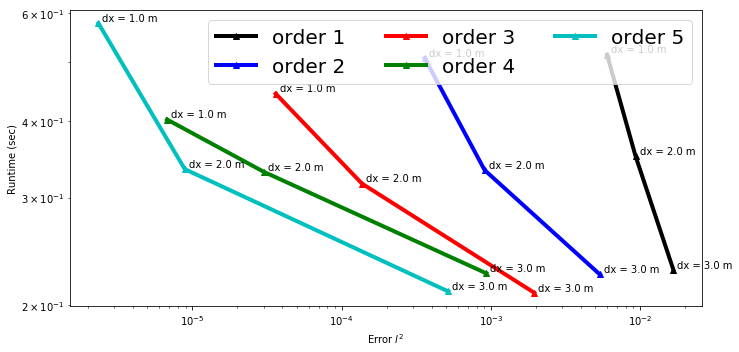

In [33]:
import matplotlib.pyplot as plt
import numpy as np

errorl2 = np.array([[  5.98426580e-03,   9.28847634e-03,   1.66402800e-02],
       [  3.59318593e-04,   9.06419934e-04,   5.33975876e-03],
       [  3.61125311e-05,   1.36598330e-04,   1.94708893e-03],
       [  6.76245793e-06,   3.00462758e-05,   9.28868787e-04],
       [  2.35054045e-06,   8.90007870e-06,   5.16072422e-04]])
timing = np.array([[ 0.513203,  0.350548,  0.228739],
       [ 0.506398,  0.332516,  0.224875],
       [ 0.443138,  0.316142,  0.209795],
       [ 0.402178,  0.330462,  0.225705],
       [ 0.577107,  0.333694,  0.210858]])
stylel = ('-^k', '-^b', '-^r', '-^g', '-^c')
dx = [1., 2., 3.]
orders = [1, 2, 3 ,4 ,5]


def plot_loglog(xvalues, yvalues, annotation=None, label=None, xlabel="Error $l^2$", ylabel="Runtime (sec)"):
    plt.figure(figsize=(10, 5))
    for i in range(0, 5):
        plt.loglog(errorl2[i, :], timing[i, :], stylel[i], label=label[i], linewidth=4)
        if annotation is not None:
            for x, y, a in zip(errorl2[i, :], timing[i, :], annotation):
                        plt.annotate(a, xy=(x, y), xytext=(4, 2),
                                     textcoords='offset points', size=10)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.tick_params(axis='both', which='both', labelsize=10)
    plt.tight_layout()
    plt.legend(fontsize=20, ncol=3, fancybox=True)
    plt.show()
        

        
plot_loglog(errorl2, timing, label=[('order %s' % o) for o in orders], annotation=[('dx = %s m' % (sc)) for sc in dx])
# plt.figure(figsize=(20, 10))
# for i in range(0, 5):
#     plt.loglog(errorl2[i, :], timing[i, :], stylel[i], label=('order %s' % orders[i]), linewidth=4)
#     for x, y, a in zip(errorl2[i, :], timing[i, :], [('dx = %s m' % (sc)) for sc in dx]):
#                 plt.annotate(a, xy=(x, y), xytext=(4, 2),
#                              textcoords='offset points', size=20)
#     plt.xlabel("error", fontsize=20)
#     plt.ylabel("runtime", fontsize=20)
#     plt.tick_params(axis='both', which='both', labelsize=20)
#     plt.tight_layout()

# # with LinePlotter(figname='dummy.pdf', plotdir='./',  xlabel='error', ylabel='runtime (sec)') as plot:
# #     for i in range(0, 5):
# #         plot.add_line(list(errorl2[i, :]), list(timing[i, :]), label=('order %s' % orders[i]), style=stylel[i],
# #                       annotations=[('dx = %s m' % (sc)) for sc in dx])
    
# plt.show()

OpesciBench: Plotting ./dummy2.pdf 


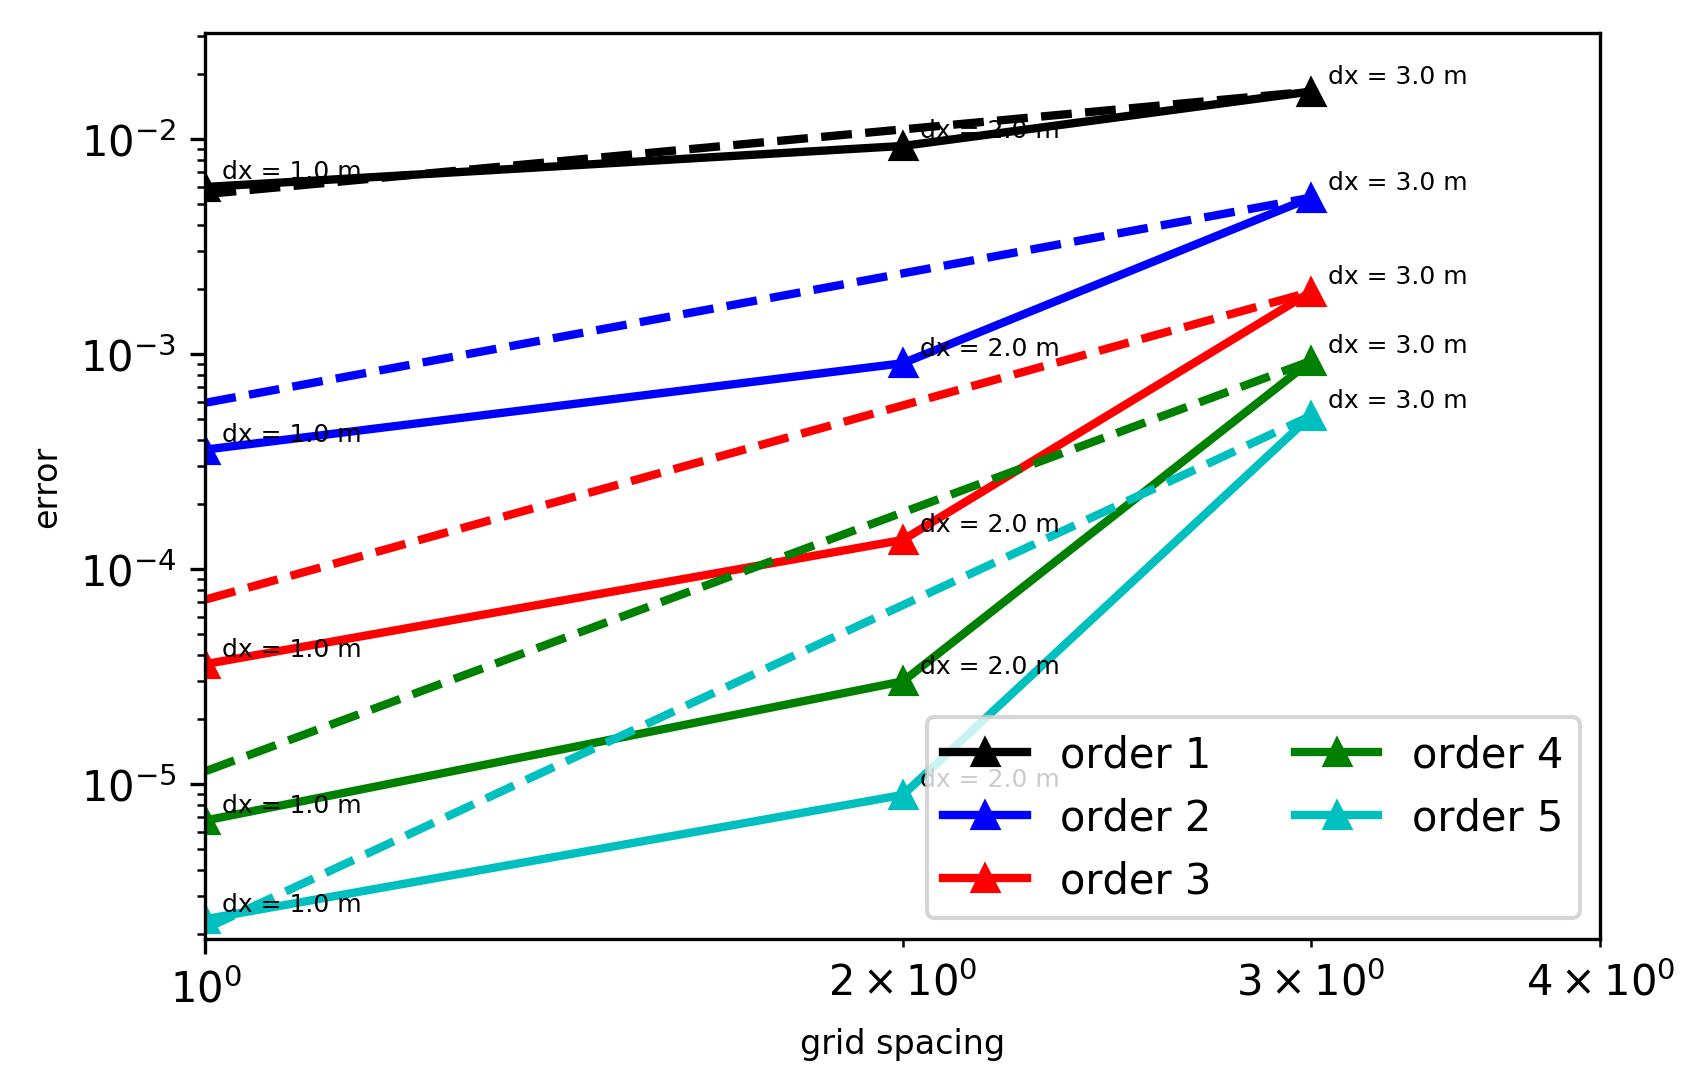

In [2]:
style2 = ('--k', '--b', '--r', '--g', '--c')
with LinePlotter(figname='dummy2.pdf', plotdir='./',  xlabel='grid spacing', ylabel = 'error') as plot:
    for i in range(0, len(orders)):
        theory = [k**(orders[i]) for k in dx]
        theory = [errorl2[i, 2]*th/theory[2] for th in theory]
        plot.add_line([sc for sc in dx], list(errorl2[i, :]), label=('order %s' % orders[i]),
                      annotations=[('dx = %s m' % (sc)) for sc in dx], style=stylel[i])
        plot.add_line([sc for sc in dx], list(theory), style=style2[i])

plt.show()